In [129]:
import pandas as pd

In [130]:
df = pd.read_csv(r'D:\protien.csv')

In [131]:
df


,Unnamed: 0,Protein IDs,A1L4H1,A2RU48,A4D1S0-2,F5H4Q5,A0A2R8Y614,A6NDU8,A6NF01,A6NIX2,...,J3KTH9,M0QY01,M0QZD8,M0R0X0,M0R2S1,Q2TAM5,Q5QPM7,Q5RHS7,Q5VZY9,S4R3H4
0,H1,Healthy,308950,0,0,0,0,0,9201000,0,...,0,3401900,0,0,0,101130000,42492000,0,0,0
1,H2,Healthy,3598700,0,0,0,0,9152400,0,1558300,...,0,3508700,17735000,9281600,0,197970000,19204000,0,1677000,32728000
2,H3,Healthy,0,0,0,4583400,0,6154800,4965000,0,...,7012300,3943500,12650000,0,0,0,31831000,0,1638300,19486000
3,H4,Healthy,0,0,0,0,0,3940100,0,2263400,...,0,0,9650500,0,0,95657000,14631000,0,0,13189000
4,H5,Healthy,1411600,0,0,0,0,4002100,0,0,...,17487000,10092000,12945000,12165000,0,8069500,27241000,0,4044900,25757000
5,H6,Healthy,0,0,0,0,0,17579000,0,0,...,0,0,0,0,0,12736000,68128000,0,0,0
6,D1,Diseased,0,0,0,0,0,6250300,4964900,0,...,5158300,0,0,0,0,51583000,29390000,0,0,13843000
7,D2,Diseased,0,0,0,4291400,0,20617000,0,0,...,0,0,8155100,2094200,0,67545000,20726000,0,0,18597000
8,D3,Diseased,0,0,0,0,0,15570000,0,341340,...,0,6729200,0,0,0,0,22925000,0,0,5563200
9,D4,Diseased,0,0,0,0,0,0,10806000,1450300,...,0,0,8173400,0,0,66132000,17880000,0,0,14290000


In [132]:
# Changing `protein Ids` to a`target variable
df.rename(columns = {'Protein IDs':'Target'}, inplace = True)

#Converting Target into numeric values
df = df.replace({'Target':{'Healthy':0,
                    'Diseased':1}
           })
df

,Unnamed: 0,Target,A1L4H1,A2RU48,A4D1S0-2,F5H4Q5,A0A2R8Y614,A6NDU8,A6NF01,A6NIX2,...,J3KTH9,M0QY01,M0QZD8,M0R0X0,M0R2S1,Q2TAM5,Q5QPM7,Q5RHS7,Q5VZY9,S4R3H4
0,H1,0,308950,0,0,0,0,0,9201000,0,...,0,3401900,0,0,0,101130000,42492000,0,0,0
1,H2,0,3598700,0,0,0,0,9152400,0,1558300,...,0,3508700,17735000,9281600,0,197970000,19204000,0,1677000,32728000
2,H3,0,0,0,0,4583400,0,6154800,4965000,0,...,7012300,3943500,12650000,0,0,0,31831000,0,1638300,19486000
3,H4,0,0,0,0,0,0,3940100,0,2263400,...,0,0,9650500,0,0,95657000,14631000,0,0,13189000
4,H5,0,1411600,0,0,0,0,4002100,0,0,...,17487000,10092000,12945000,12165000,0,8069500,27241000,0,4044900,25757000
5,H6,0,0,0,0,0,0,17579000,0,0,...,0,0,0,0,0,12736000,68128000,0,0,0
6,D1,1,0,0,0,0,0,6250300,4964900,0,...,5158300,0,0,0,0,51583000,29390000,0,0,13843000
7,D2,1,0,0,0,4291400,0,20617000,0,0,...,0,0,8155100,2094200,0,67545000,20726000,0,0,18597000
8,D3,1,0,0,0,0,0,15570000,0,341340,...,0,6729200,0,0,0,0,22925000,0,0,5563200
9,D4,1,0,0,0,0,0,0,10806000,1450300,...,0,0,8173400,0,0,66132000,17880000,0,0,14290000


Remove columns having more than 30% of 0 values

In [133]:
def remove_zero_values(df,k):
    '''Remove columns having more than 30% of 0 values or nan values'''
    n = len(df)
    column = df.columns
    for item in column:
        if item == 'Unnamed: 0' or item=='Target':
            continue
        count=0
        for i in range(n):
            if df[item][i]==0:
                count +=1
        if count>=k/100*n:
            df = df.drop([item],axis=1)
        
    
    return df
        
k = 30
df = remove_zero_values(df,k)

df


,Unnamed: 0,Target,A6NDU8,Q99613-2,I3L2L5,E9PLD3,K7ENE5,Q13838-2,O00151,H3BNE1,...,F5H7S3,E7EVA0,E9PHY5,G3V1N2,H0YKD8,H7BZJ3,H7C3P4,Q2TAM5,Q5QPM7,S4R3H4
0,H1,0,0,17779000,76671000,0,0,15319000,15731000,9161900,...,10011000,83410000,1105100,54225000,14722000,47098000,6781000,101130000,42492000,0
1,H2,0,9152400,12379000,63201000,1636800,50470000,79515000,90464000,8824800,...,36764000,116780000,4933200,23365000,3601200,19345000,10437000,197970000,19204000,32728000
2,H3,0,6154800,16438000,72890000,1717000,12162000,62563000,309760000,2188500,...,14964000,86434000,1987100,32220000,9612100,32019000,19216000,0,31831000,19486000
3,H4,0,3940100,27439000,44761000,1486100,9766000,45033000,53194000,9448900,...,19635000,88767000,2316500,16720000,2950700,11087000,14039000,95657000,14631000,13189000
4,H5,0,4002100,12354000,72785000,2224100,7947200,106170000,416620000,7057700,...,13632000,122680000,1941500,36220000,12280000,20322000,18254000,8069500,27241000,25757000
5,H6,0,17579000,5744700,28746000,0,0,0,169310000,1126300,...,4949600,14878000,0,242930000,22507000,24027000,0,12736000,68128000,0
6,D1,1,6250300,17779000,80688000,1345800,13935000,52405000,86511000,7587200,...,26285000,34498000,3039100,34987000,8729600,19219000,26402000,51583000,29390000,13843000
7,D2,1,20617000,27932000,142410000,3324800,16089000,95332000,53457000,10996000,...,25128000,22622000,2008000,15935000,14435000,47445000,19959000,67545000,20726000,18597000
8,D3,1,15570000,27925000,88631000,2094900,28418000,40528000,20066000,14103000,...,37202000,65471000,0,39364000,0,62175000,17990000,0,22925000,5563200
9,D4,1,0,257450000,52750000,1188600,11611000,33477000,62512000,7848600,...,23483000,79435000,6712100,15754000,2487400,17732000,15153000,66132000,17880000,14290000


In [134]:
def replace_zero_mean(df):
    '''Replace zero values with mean '''
    columns = list(df.columns)
    columns.pop(0)
    columns.pop(0)

    for item in columns:
        
        mean = df[item].mean()
        #print(item, mean)
        df = df.replace({item:{0:mean}})

    return df

df = replace_zero_mean(df)


    

In [135]:
df

,Unnamed: 0,Target,A6NDU8,Q99613-2,I3L2L5,E9PLD3,K7ENE5,Q13838-2,O00151,H3BNE1,...,F5H7S3,E7EVA0,E9PHY5,G3V1N2,H0YKD8,H7BZJ3,H7C3P4,Q2TAM5,Q5QPM7,S4R3H4
0,H1,0,8318950.0,1.777900e+07,76671000,1.419492e+06,1.392977e+07,1.531900e+07,15731000,9161900,...,10011000,83410000,1.105100e+06,54225000,1.472200e+07,47098000,6.781000e+06,1.011300e+08,42492000,12813025.0
1,H2,0,9152400.0,1.237900e+07,63201000,1.636800e+06,5.047000e+07,7.951500e+07,90464000,8824800,...,36764000,116780000,4.933200e+06,23365000,3.601200e+06,19345000,1.043700e+07,1.979700e+08,19204000,32728000.0
2,H3,0,6154800.0,1.643800e+07,72890000,1.717000e+06,1.216200e+07,6.256300e+07,309760000,2188500,...,14964000,86434000,1.987100e+06,32220000,9.612100e+06,32019000,1.921600e+07,6.064021e+07,31831000,19486000.0
3,H4,0,3940100.0,2.743900e+07,44761000,1.486100e+06,9.766000e+06,4.503300e+07,53194000,9448900,...,19635000,88767000,2.316500e+06,16720000,2.950700e+06,11087000,1.403900e+07,9.565700e+07,14631000,13189000.0
4,H5,0,4002100.0,1.235400e+07,72785000,2.224100e+06,7.947200e+06,1.061700e+08,416620000,7057700,...,13632000,122680000,1.941500e+06,36220000,1.228000e+07,20322000,1.825400e+07,8.069500e+06,27241000,25757000.0
5,H6,0,17579000.0,5.744700e+06,28746000,1.419492e+06,1.392977e+07,5.333033e+07,169310000,1126300,...,4949600,14878000,2.665233e+06,242930000,2.250700e+07,24027000,1.432166e+07,1.273600e+07,68128000,12813025.0
6,D1,1,6250300.0,1.777900e+07,80688000,1.345800e+06,1.393500e+07,5.240500e+07,86511000,7587200,...,26285000,34498000,3.039100e+06,34987000,8.729600e+06,19219000,2.640200e+07,5.158300e+07,29390000,13843000.0
7,D2,1,20617000.0,2.793200e+07,142410000,3.324800e+06,1.608900e+07,9.533200e+07,53457000,10996000,...,25128000,22622000,2.008000e+06,15935000,1.443500e+07,47445000,1.995900e+07,6.754500e+07,20726000,18597000.0
8,D3,1,15570000.0,2.792500e+07,88631000,2.094900e+06,2.841800e+07,4.052800e+07,20066000,14103000,...,37202000,65471000,2.665233e+06,39364000,8.388408e+06,62175000,1.799000e+07,6.064021e+07,22925000,5563200.0
9,D4,1,8318950.0,2.574500e+08,52750000,1.188600e+06,1.161100e+07,3.347700e+07,62512000,7848600,...,23483000,79435000,6.712100e+06,15754000,2.487400e+06,17732000,1.515300e+07,6.613200e+07,17880000,14290000.0


In [136]:
df.describe()

,Target,A6NDU8,Q99613-2,I3L2L5,E9PLD3,K7ENE5,Q13838-2,O00151,H3BNE1,O00170,...,F5H7S3,E7EVA0,E9PHY5,G3V1N2,H0YKD8,H7BZJ3,H7C3P4,Q2TAM5,Q5QPM7,S4R3H4
count,12.000000,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,...,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01
mean,0.500000,9.705442e+06,4.269721e+07,6.707008e+07,1.774365e+06,1.741221e+07,5.777453e+07,1.243570e+08,8.534883e+06,9.948927e+06,...,2.884180e+07,7.063183e+07,3.331542e+06,4.628344e+07,9.786476e+06,2.788525e+07,1.551513e+07,7.580026e+07,2.657225e+07,1.494853e+07
std,0.522233,5.459859e+06,6.874517e+07,3.055401e+07,5.859762e+05,1.157531e+07,2.578535e+07,1.235084e+08,4.254180e+06,5.254544e+06,...,2.119766e+07,3.481482e+07,2.091748e+06,6.336720e+07,5.701030e+06,1.604846e+07,5.377084e+06,5.096395e+07,1.580829e+07,8.316715e+06
min,0.000000,3.940100e+06,5.744700e+06,2.874600e+07,1.188600e+06,7.947200e+06,1.531900e+07,1.573100e+07,1.126300e+06,3.190100e+06,...,4.949600e+06,1.487800e+07,1.105100e+06,5.798300e+06,2.487400e+06,1.108700e+07,6.781000e+06,8.069500e+06,1.202800e+07,4.934600e+06
25%,0.000000,6.026275e+06,1.542325e+07,4.921450e+07,1.419492e+06,1.202425e+07,4.390675e+07,5.277275e+07,7.454825e+06,6.642550e+06,...,1.463100e+07,4.251700e+07,2.002775e+06,1.652375e+07,7.191606e+06,1.884725e+07,1.313850e+07,5.837591e+07,1.706775e+07,1.100057e+07
50%,0.500000,8.318950e+06,2.260900e+07,6.799300e+07,1.561450e+06,1.392977e+07,5.286767e+07,7.451150e+07,8.336700e+06,9.307112e+06,...,2.430550e+07,8.142250e+07,2.665233e+06,3.360350e+07,9.032750e+06,2.118600e+07,1.503500e+07,6.338610e+07,2.182550e+07,1.351600e+07
75%,1.000000,1.208325e+07,3.080220e+07,7.767525e+07,2.035575e+06,1.625650e+07,6.741000e+07,1.646900e+08,9.835675e+06,1.181025e+07,...,3.687350e+07,8.775450e+07,3.512625e+06,3.825325e+07,1.281875e+07,3.578875e+07,1.849450e+07,9.702525e+07,3.000025e+07,1.881925e+07
max,1.000000,2.061700e+07,2.574500e+08,1.424100e+08,3.324800e+06,5.047000e+07,1.061700e+08,4.166200e+08,1.636500e+07,2.071900e+07,...,8.136200e+07,1.226800e+08,7.940200e+06,2.429300e+08,2.250700e+07,6.217500e+07,2.640200e+07,1.979700e+08,6.812800e+07,3.272800e+07


In [137]:
#plotting scatter plot with one of the columns on x axis and other columns on the y axis

import hvplot.pandas
import numpy as np
columns=list(df.columns)
#print(columns )
columns.pop(0)
columns.pop(0)

x = columns.pop(0)
y = columns




df.hvplot(x=x, y=y[:10], kind='scatter')




    

:NdOverlay   [Variable]
   :Scatter   [A6NDU8]   (value)

In the above scatter plot, due to highvalue of  some of the outliers most of the datapoints are plotted near 0. To rescale the values of the feaures, we will be using log transformation and then normalisation. 

0


<AxesSubplot:>

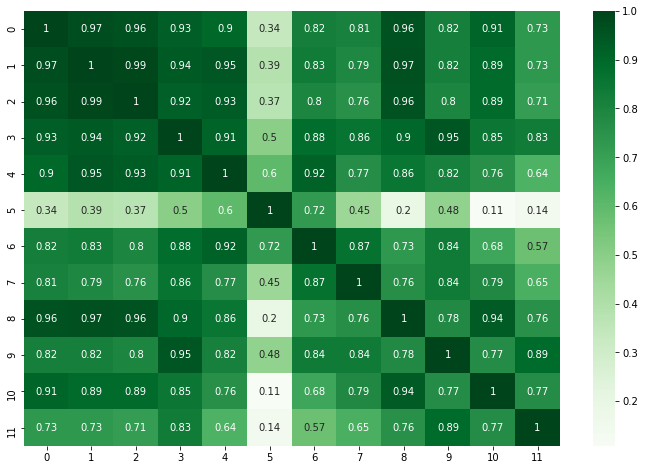

In [138]:
# Correlation matrix of samlples
df_copy = df.drop(['Unnamed: 0','Target'],axis=1)

df1 = df_copy.T

corr = df1.corr()

columns = corr.columns

print(columns[0])

#print(df1)

#print('corr',corr)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="Greens",annot=True)









Conclusion  from the above correlation matrix is that the sample 5 is badly correlated. This means there is some experimental error while taking the values for this sample. So we have to redo experiment for this sample.

In [139]:
a=df.corr()["Target"]
print(a[1:].max(),a[1:].min(), sep = '\n')

0.8704911891492526
-0.7700951503125576


In [140]:
df_copy = df.drop(['Unnamed: 0'],axis=1)

#This code is to find out highly correlated features with the Target feature
for i in range(a.shape[0]):
    if (a[i]> 0.8) or (a[i]< -0.84):
        print(df_copy.columns[i],a[i])

Target 1.0
P10768 0.8037790118313294
P22626 0.806827637621387
P31146 0.816821469311086
Q14019 0.8458214012992346
Q7Z2W4-2 0.8598955100353921
Q96PK6 0.8704911891492526
B7Z879 0.8065120280671442


Text(0, 0.5, 'Target')

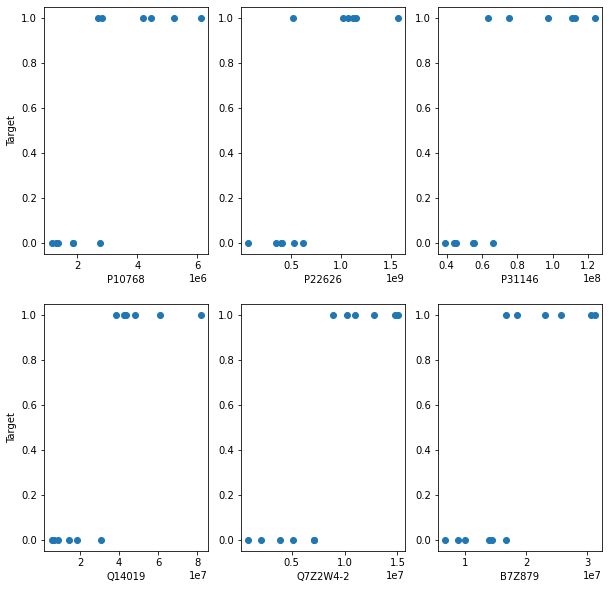

In [141]:
fig = plt.figure(figsize= (10,10))
fig. tight_layout(pad=3.0)
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2) 
ax3 = plt.subplot(2,3,3) 
ax4 = plt.subplot(2,3,4) 
ax5 = plt.subplot(2,3,5) 
ax6 = plt.subplot(2,3,6) 

ax1.scatter(df_copy["P10768"],df_copy["Target"])
ax2.scatter(df_copy["P22626"],df_copy["Target"])
ax3.scatter(df_copy["P31146"],df_copy["Target"])
ax4.scatter(df_copy["Q14019"],df_copy["Target"])
ax5.scatter(df_copy["Q7Z2W4-2"],df_copy["Target"])
ax6.scatter(df_copy["B7Z879"],df_copy["Target"])

ax1.set_xlabel("P10768")
ax2.set_xlabel("P22626")
ax3.set_xlabel("P31146")
ax4.set_xlabel("Q14019")
ax5.set_xlabel("Q7Z2W4-2")
ax6.set_xlabel("B7Z879")

ax1.set_ylabel("Target")
ax4.set_ylabel('Target')


In the above scatter plots we can clearly see the coorelation between features and "Target"

In [142]:
import numpy as np
df_log = df.drop(['Unnamed: 0','Target'],axis=1)

df_log = np.log2(df_log)  #log2 transformation 






#df_log2 = np.log2(df)

In [143]:
import math
def normalisation(dataframe):
    '''function to do normalisation of the data'''
    items = dataframe.columns
    for item in items:
        mean = dataframe[item].mean()
        std_dev = dataframe[item].std()
        i =0
        for val in dataframe[item]:
            #print(val,end=' ')
            val = 1/math.sqrt(2*math.pi*std_dev**2)*math.exp(-(val-mean/std_dev)**2/2)
            #print(val)
            dataframe[item][i] = val
            i +=1

    return dataframe



    

<AxesSubplot:ylabel='Density'>

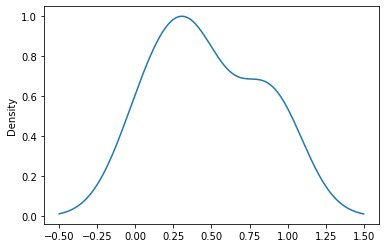

In [166]:
#This code uses standardization technique

df_log_copy1 = df_log.copy(deep=True)

for i in df_log_copy1.columns:
    if i =="result":
        continue
    a=(df_log_copy1[i]-df_log_copy1[i].min())/(df_log_copy1[i].max()-df_log_copy1[i].min())
    df_log_copy1[i]=a

df_log_copy1["Q8WUM4"].plot(kind="density")

In [164]:
df_log_copy1

,Q8WUM4,Q53SF7,P16401,Q8ND94,Q96B54,B7ZC39,Q9NRV9,Q15181,P62826,Q96QK1,...,P30050,K7EMH1,A0A2R8Y6B6,J3QL05,Q07666,D6RDG7,P30041,A0A1B0GVS3,Q14195-2,G3XAL9
0,0.000000,0.052444,0.000000,0.488402,1.000000,0.001113,0.925064,0.114731,1.000000,0.287380,...,0.009282,0.000000,0.261568,0.708932,0.223554,0.971263,0.011198,0.895735,0.126583,0.022719
1,0.295150,0.010866,0.040990,0.175816,0.398909,0.067627,0.871296,0.016256,0.900848,0.836361,...,0.008177,0.309619,0.192100,0.556518,0.231860,0.537289,0.131150,0.153418,0.000000,0.051395
2,0.113758,0.083867,0.541512,0.507604,0.992419,0.009338,0.284957,0.033648,0.997766,0.138754,...,0.000398,0.044900,0.187429,0.027172,0.004988,0.921947,0.041599,0.915946,0.077374,0.006096
3,0.398079,0.297511,0.428946,0.502916,0.846589,0.038296,0.014312,0.114802,0.650159,0.287380,...,0.000057,0.287349,0.039211,0.041254,0.008170,0.372499,0.039693,0.270893,0.145934,0.012248
4,0.102866,0.297511,0.598638,1.000000,0.992999,0.000000,0.938654,0.012409,0.821103,1.000000,...,0.000066,0.020131,0.163254,0.283579,1.000000,0.878505,0.341434,0.108827,0.054571,0.007683
5,0.469763,0.297511,0.268457,0.000000,0.398909,0.067627,1.000000,0.114475,0.998342,0.287380,...,0.000000,0.560009,0.156465,0.427995,0.002759,0.971263,1.000000,0.787121,0.002487,0.000000
6,0.880076,1.000000,0.425081,0.623235,0.729591,0.212986,0.284957,0.243081,0.800674,0.013817,...,0.054972,0.410807,0.443620,0.634271,0.036634,0.911636,0.000116,0.858197,0.769898,0.097202
7,0.306489,0.815968,0.938789,0.897359,0.615737,0.049343,0.320833,0.219048,0.042289,0.502027,...,0.359126,0.314948,0.011454,0.913884,0.019315,0.000000,0.040885,0.000000,0.529425,1.000000
8,0.423360,0.425793,1.000000,0.958231,0.289103,0.131214,0.000000,0.630737,0.149652,0.000000,...,1.000000,0.160809,1.000000,0.970655,0.000098,1.000000,0.003603,1.000000,0.080521,0.093632
9,0.862615,0.913459,0.699971,0.739371,0.398909,0.508497,0.110589,0.001143,0.816345,0.105448,...,0.000172,0.937267,0.016894,0.274276,0.000103,0.186680,0.000603,0.060496,0.022208,0.116512


In [146]:
df_log = normalisation(df_log)
#Applying normalisation

<AxesSubplot:title={'center':'After'}>

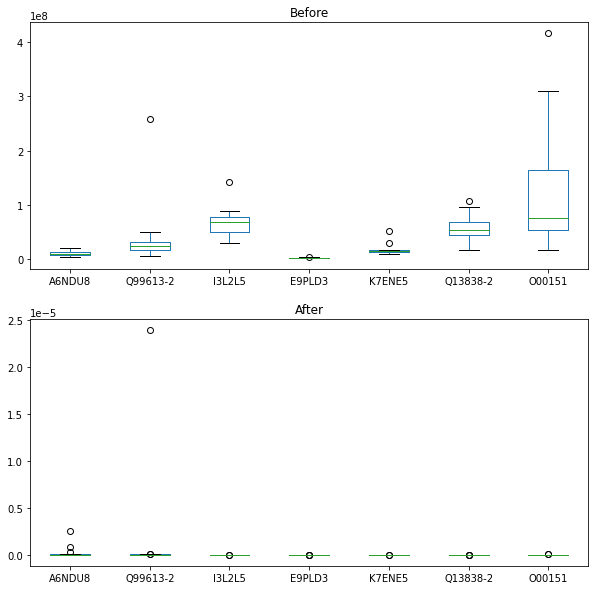

In [147]:
figure, axes = plt.subplots(2, 1,figsize=(10,10))

df[ ['A6NDU8', 'Q99613-2', 'I3L2L5', 'E9PLD3','K7ENE5', 'Q13838-2', 'O00151',]
      ].plot(kind='box',title='Before',ax=axes[0])

df_log[ ['A6NDU8', 'Q99613-2', 'I3L2L5', 'E9PLD3','K7ENE5', 'Q13838-2', 'O00151',]
      ].plot(kind='box',title='After',ax=axes[1])

Text(0.5, 1.0, 'After log transformation and noramlisation ')

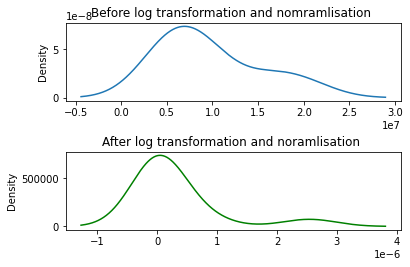

In [148]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots(2, 1)

figure. tight_layout(pad=3.0)

df['A6NDU8'].plot(kind='density',subplots=True,ax = axes[0],)

axes[0].set_title('Before log transformation and nomramlisation ')

df_log['A6NDU8'].plot(kind='density',subplots=True,ax = axes[1],color='green',)

axes[1].set_title('After log transformation and noramlisation ')



In [149]:
X = df_log.iloc[:,:]
X

,A6NDU8,Q99613-2,I3L2L5,E9PLD3,K7ENE5,Q13838-2,O00151,H3BNE1,O00170,O00231-2,...,F5H7S3,E7EVA0,E9PHY5,G3V1N2,H0YKD8,H7BZJ3,H7C3P4,Q2TAM5,Q5QPM7,S4R3H4
0,1.671926e-09,5.361568e-09,1.876953e-40,1.471612e-194,1.380722e-23,1.406015e-25,6.875112e-08,0.021968,1.767775e-07,0.356514,...,0.251591,0.341303,3.340646e-10,2.096670e-10,0.391482,5.059963e-09,5.146268e-94,3.687318e-11,1.277037e-14,0.001876
1,3.917236e-09,1.057330e-07,4.203882e-42,6.683737e-192,4.190946e-16,7.957490e-16,2.556511e-15,0.024935,3.352791e-06,0.392984,...,0.008535,0.411718,4.014707e-05,2.683251e-07,0.090221,9.143513e-13,1.673196e-88,3.297244e-14,7.569284e-19,0.066516
2,1.005389e-10,1.046783e-08,6.996298e-41,5.167159e-191,1.836753e-24,4.298452e-17,3.328080e-22,0.347543,2.176239e-07,0.098164,...,0.128801,0.352050,5.717885e-08,2.081115e-08,0.388054,1.474670e-10,5.472727e-81,4.115603e-09,4.311502e-16,0.011595
3,1.107601e-12,1.049465e-10,3.925167e-45,1.059799e-193,6.493655e-26,6.469371e-19,9.022043e-13,0.019750,1.289702e-10,0.331020,...,0.067716,0.359687,1.948801e-07,3.059988e-06,0.052529,1.801106e-15,8.235569e-85,6.323158e-11,1.997070e-20,0.002152
4,1.306046e-12,1.074259e-07,6.801701e-41,3.036901e-186,2.567029e-27,2.290194e-14,4.567347e-24,0.049937,1.739568e-05,0.386435,...,0.155013,0.414893,4.729112e-08,7.775942e-09,0.408475,1.538475e-12,1.314870e-81,2.425595e-03,6.457876e-17,0.031820
5,7.941891e-07,2.389614e-05,3.523496e-49,1.471612e-194,1.380722e-23,5.760455e-18,1.181714e-18,0.293798,5.319924e-05,0.356514,...,0.361433,0.003240,5.728549e-07,1.584678e-17,0.271198,8.685718e-12,1.449046e-84,2.517994e-04,2.231818e-12,0.001876
6,1.166039e-10,5.361568e-09,5.056864e-40,1.474356e-195,1.388378e-23,4.606497e-18,4.283865e-15,0.040338,1.967295e-08,0.360080,...,0.028616,0.068056,1.514535e-06,1.043710e-08,0.367521,8.530554e-13,3.282506e-77,1.632628e-08,1.640179e-16,0.002698
7,2.540128e-06,8.855816e-11,2.155093e-35,5.918721e-179,1.127548e-22,6.687278e-15,8.566727e-13,0.011372,8.093265e-07,0.011038,...,0.033065,0.017754,6.226414e-08,4.258960e-06,0.394596,5.395728e-09,1.563655e-80,1.593510e-09,2.040587e-18,0.009639
8,3.163159e-07,8.877045e-11,3.084078e-39,2.425744e-187,2.945667e-19,1.606656e-19,9.315546e-09,0.004143,6.007881e-07,0.391248,...,0.008143,0.257743,5.728549e-07,3.794056e-09,0.357317,5.319516e-08,8.765485e-82,4.115603e-09,7.432302e-18,0.000017
9,1.671926e-09,3.181715e-22,1.120946e-43,6.769020e-198,9.140024e-25,1.211499e-20,1.613773e-13,0.036365,2.516169e-09,0.230808,...,0.040766,0.325699,2.501182e-04,4.603689e-06,0.030934,3.601084e-13,7.140752e-84,1.922965e-09,2.957239e-19,0.003122


[0.         0.         0.         ... 0.00166667 0.         0.00807937]


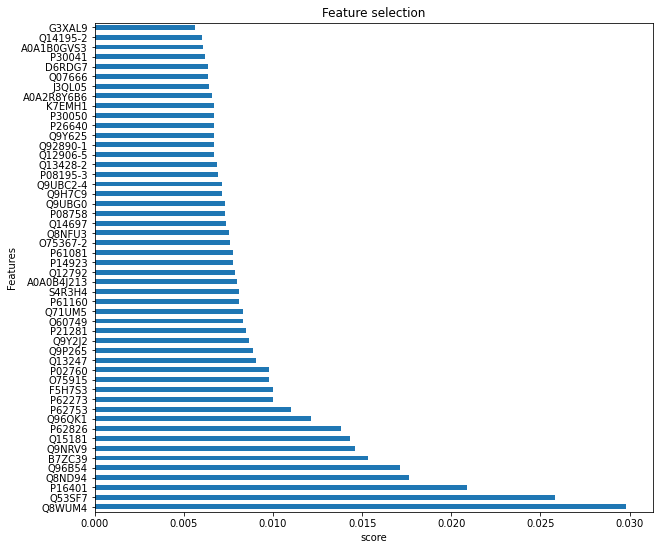

In [150]:
# Code to detect some important features

X = df_log.iloc[:,:]  #independent columns
y = df.iloc[:,1]    #target column 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
figure = plt.figure(figsize=(10,9))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.title('Feature selection')
plt.ylabel('Features')
plt.xlabel('score')
plt.show()

In [151]:
imp_features = feat_importances.nlargest(50)

imp_features.index

Index(['Q8WUM4', 'Q53SF7', 'P16401', 'Q8ND94', 'Q96B54', 'B7ZC39', 'Q9NRV9',
       'Q15181', 'P62826', 'Q96QK1', 'P62753', 'P62273', 'F5H7S3', 'O75915',
       'P02760', 'Q13247', 'Q9P265', 'Q9Y2J2', 'P21281', 'O60749', 'Q71UM5',
       'P61160', 'S4R3H4', 'A0A0B4J213', 'Q12792', 'P14923', 'P61081',
       'O75367-2', 'Q8NFU3', 'Q14697', 'P08758', 'Q9UBG0', 'Q9H7C9',
       'Q9UBC2-4', 'P08195-3', 'Q13428-2', 'Q12906-5', 'Q92890-1', 'Q9Y625',
       'P26640', 'P30050', 'K7EMH1', 'A0A2R8Y6B6', 'J3QL05', 'Q07666',
       'D6RDG7', 'P30041', 'A0A1B0GVS3', 'Q14195-2', 'G3XAL9'],
      dtype='object')

In [152]:
columns = imp_features.index
    
df_log = df_log[columns]   

df_log

,Q8WUM4,Q53SF7,P16401,Q8ND94,Q96B54,B7ZC39,Q9NRV9,Q15181,P62826,Q96QK1,...,P30050,K7EMH1,A0A2R8Y6B6,J3QL05,Q07666,D6RDG7,P30041,A0A1B0GVS3,Q14195-2,G3XAL9
0,0.000884,0.031631,0.010968,0.225180,0.374654,0.000564,0.331905,0.040180,0.385056,0.132621,...,1.667011e-08,0.020416,0.096116,0.275308,3.466714e-02,0.394652,0.001339,0.372941,0.053453,1.777486e-03
1,0.112161,0.016711,0.027263,0.117269,0.149617,0.023707,0.312878,0.005988,0.347864,0.351707,...,1.468537e-08,0.137021,0.070612,0.216396,3.595517e-02,0.250791,0.015508,0.082219,0.002396,4.020884e-03
2,0.043773,0.042908,0.226236,0.231809,0.371816,0.003426,0.105395,0.012026,0.384218,0.073308,...,7.139990e-10,0.037325,0.068897,0.011789,7.744168e-04,0.378304,0.004930,0.380856,0.033604,4.769546e-04
3,0.150967,0.119579,0.181487,0.230190,0.317220,0.013502,0.009623,0.040205,0.253829,0.132621,...,1.028490e-10,0.128634,0.014481,0.017232,1.267885e-03,0.196164,0.004705,0.128227,0.061258,9.582797e-04
4,0.039667,0.119579,0.248945,0.401792,0.372033,0.000177,0.336714,0.004652,0.317951,0.417011,...,1.193018e-10,0.027997,0.060022,0.110897,1.550698e-01,0.363903,0.040347,0.064755,0.024407,6.011727e-04
5,0.177994,0.119579,0.117688,0.056574,0.149617,0.023707,0.358422,0.040091,0.384434,0.132621,...,3.102839e-14,0.231321,0.057529,0.166718,4.287818e-04,0.394652,0.118138,0.330403,0.003399,6.995038e-08
6,0.332690,0.371681,0.179950,0.271726,0.273418,0.074284,0.105395,0.084746,0.310288,0.023449,...,9.872399e-08,0.175130,0.162954,0.246449,5.681663e-03,0.374886,0.000030,0.358239,0.312936,7.604539e-03
7,0.116436,0.305638,0.384165,0.366359,0.230794,0.017346,0.118090,0.076401,0.025813,0.218282,...,6.449569e-07,0.139028,0.004290,0.354527,2.995990e-03,0.072682,0.004845,0.022134,0.215941,7.823385e-02
8,0.160499,0.165616,0.408498,0.387373,0.108508,0.045832,0.004559,0.219347,0.066086,0.017935,...,1.795908e-06,0.080978,0.367221,0.376471,1.610612e-05,0.404178,0.000442,0.413775,0.034874,7.325266e-03
9,0.326106,0.340624,0.289228,0.311819,0.149617,0.177104,0.043692,0.000740,0.316166,0.060016,...,3.086319e-10,0.373400,0.006287,0.107301,1.695165e-05,0.134566,0.000087,0.045827,0.011353,9.115243e-03


In [167]:
from sklearn.cluster import KMeans

df_log_copy = df_log[:][:]

kmeans = KMeans(n_clusters=2, random_state=0)

labels =  kmeans.fit_predict(df_log_copy)

labels

#filtered_label0 = df_log_copy[labels == 1]


#filtered_label0


array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

We got same labels as that of in 'Target'. This means the features that we selected are important features.

In [154]:
from sklearn.model_selection import train_test_split
X = df_log
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.2)

print(X_test.index,y_test ,sep='\n')



Int64Index([6, 11, 4], dtype='int64')
6     1
11    1
4     0
Name: Target, dtype: int64


In [155]:
X_train

,Q8WUM4,Q53SF7,P16401,Q8ND94,Q96B54,B7ZC39,Q9NRV9,Q15181,P62826,Q96QK1,...,P30050,K7EMH1,A0A2R8Y6B6,J3QL05,Q07666,D6RDG7,P30041,A0A1B0GVS3,Q14195-2,G3XAL9
10,0.301398,0.020851,0.406795,0.387373,0.000273,0.348118,0.026844,0.347563,0.009951,0.036983,...,1.103658e-06,0.393706,0.006596,0.387814,0.000006,0.372439,0.000297,0.159371,0.405748,1.864596e-04
2,0.043773,0.042908,0.226236,0.231809,0.371816,0.003426,0.105395,0.012026,0.384218,0.073308,...,7.139990e-10,0.037325,0.068897,0.011789,0.000774,0.378304,0.004930,0.380856,0.033604,4.769546e-04
8,0.160499,0.165616,0.408498,0.387373,0.108508,0.045832,0.004559,0.219347,0.066086,0.017935,...,1.795908e-06,0.080978,0.367221,0.376471,0.000016,0.404178,0.000442,0.413775,0.034874,7.325266e-03
1,0.112161,0.016711,0.027263,0.117269,0.149617,0.023707,0.312878,0.005988,0.347864,0.351707,...,1.468537e-08,0.137021,0.070612,0.216396,0.035955,0.250791,0.015508,0.082219,0.002396,4.020884e-03
7,0.116436,0.305638,0.384165,0.366359,0.230794,0.017346,0.118090,0.076401,0.025813,0.218282,...,6.449569e-07,0.139028,0.004290,0.354527,0.002996,0.072682,0.004845,0.022134,0.215941,7.823385e-02
9,0.326106,0.340624,0.289228,0.311819,0.149617,0.177104,0.043692,0.000740,0.316166,0.060016,...,3.086319e-10,0.373400,0.006287,0.107301,0.000017,0.134566,0.000087,0.045827,0.011353,9.115243e-03
3,0.150967,0.119579,0.181487,0.230190,0.317220,0.013502,0.009623,0.040205,0.253829,0.132621,...,1.028490e-10,0.128634,0.014481,0.017232,0.001268,0.196164,0.004705,0.128227,0.061258,9.582797e-04
0,0.000884,0.031631,0.010968,0.225180,0.374654,0.000564,0.331905,0.040180,0.385056,0.132621,...,1.667011e-08,0.020416,0.096116,0.275308,0.034667,0.394652,0.001339,0.372941,0.053453,1.777486e-03
5,0.177994,0.119579,0.117688,0.056574,0.149617,0.023707,0.358422,0.040091,0.384434,0.132621,...,3.102839e-14,0.231321,0.057529,0.166718,0.000429,0.394652,0.118138,0.330403,0.003399,6.995038e-08


In [168]:
# Logistic classifier

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)




y_predict = clf.predict(X_test)

print(y_predict,y_test ,sep='\n')

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict)





[0 1 0]
6     1
11    1
4     0
Name: Target, dtype: int64


0.6666666666666666

In [161]:
#SVM classifier
from sklearn.svm import SVC
clf= SVC(kernel='rbf', C=100, gamma = 0.01)
clf= clf.fit(X_train,y_train)
y_predict =  clf.predict(X_test)


print(accuracy_score(y_test,y_predict))



1.0
